# <html>
   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">
 
</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: NNDL </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Project1 - Question2 </h1>

</div>

   <div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- sid:810100084 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Reza Alavi- sid:810100251 </h1>

</div>
   

</html>

# <div style="text-align: center; font-family: Arial, sans-serif; font-size: 24px; color: #333; background-color: #d0e7ff; padding: 10px; border-radius: 8px;">Part 1</div>

# <div style="text-align: center; font-family: Arial, sans-serif; font-size: 24px; color: #333; background-color: #4ee7ff; padding: 10px; border-radius: 8px;">Part 1-A</div>

In [ ]:
import numpy as np


def tanh(x):
    return np.tanh(x)

def identity(x):
    return x

def forward(X, W1, W2):
    Z = tanh(np.dot(X, W1))


    y_pred = identity(np.dot(Z, W2))

    return y_pred, Z


N, D = 5, 2
X = np.random.randn(N, D)


M = 30
W1 = np.random.randn(D, M)
W2 = np.random.randn(M, 1)


y_pred, Z = forward(X, W1, W2)


print("Predicted Outputs (y_pred):")
print(y_pred)
print("\nHidden Layer Activations (Z):")
print(Z)

Predicted Outputs (y_pred):
[[-2.20149145]
 [ 4.8553796 ]
 [-1.09088144]
 [ 0.11857962]
 [-2.50570277]]

Hidden Layer Activations (Z):
[[ 0.76496038 -0.98539819  0.59087757  0.86340241 -0.33041777  0.95709439
  -0.5486407  -0.33345318 -0.86303312 -0.56304704  0.8107223   0.98198832
   0.82843035 -0.44943768 -0.84481843  0.52642681 -0.69560183  0.85526172
   0.83571843  0.80786695 -0.71521209  0.66885332  0.86151528 -0.05242281
  -0.9701443  -0.95585138 -0.40659228 -0.99146978 -0.97943427 -0.38398273]
 [ 0.90344694  0.25705779 -0.86354852  0.70926183 -0.53294048  0.92816637
   0.58773175 -0.65059445 -0.99242898 -0.18987073  0.09964082  0.10420869
  -0.86132273  0.94608688 -0.91533716 -0.01999667  0.9669923   0.50350568
  -0.57245603  0.99945523  0.4071883  -0.83436024  0.8889232   0.99524396
   0.48730615  0.67741032  0.64322713 -0.84881755  0.88946697  0.35577279]
 [ 0.8218224  -0.96519554  0.29048305  0.85847931 -0.39185369  0.96075272
  -0.36168338 -0.42598997 -0.93341019 -0.52106317

# <div style="text-align: center; font-family: Arial, sans-serif; font-size: 24px; color: #333; background-color: #4ee7ff; padding: 10px; border-radius: 8px;">Part 1-B</div>

Iteration 100/1000, Error: 0.0542
Iteration 200/1000, Error: 0.2831
Iteration 300/1000, Error: 0.1450
Iteration 400/1000, Error: 0.0010
Iteration 500/1000, Error: 0.0071
Iteration 600/1000, Error: 0.8184
Iteration 700/1000, Error: 0.0006
Iteration 800/1000, Error: 0.2249
Iteration 900/1000, Error: 0.1820
Iteration 1000/1000, Error: 0.1594


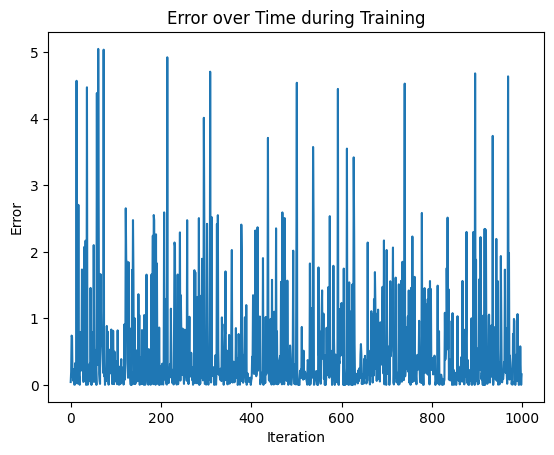

In [ ]:
import numpy as np


def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def identity(x):
    return x

def squared_error(y_true, y_pred):
    return 0.5 * np.mean((y_true - y_pred) ** 2)


def forward(X, W1, W2):
    Z = tanh(np.dot(X, W1))
    y_pred = identity(np.dot(Z, W2))
    return y_pred, Z


def backward(X, y, M, iters, lr):
    N, D = X.shape


    W1 = np.random.randn(D, M) * 0.1
    W2 = np.random.randn(M, 1) * 0.1

    error_over_time = []

    for i in range(iters):

        idx = np.random.randint(0, N)
        X_sample = X[idx:idx+1]
        y_sample = y[idx:idx+1]


        y_pred, Z = forward(X_sample, W1, W2)


        error = squared_error(y_sample, y_pred)
        error_over_time.append(error)



        dZ2 = y_pred - y_sample
        dW2 = np.dot(Z.T, dZ2)


        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * tanh_derivative(Z)
        dW1 = np.dot(X_sample.T, dZ1)


        W1 -= lr * dW1
        W2 -= lr * dW2


        if (i + 1) % 100 == 0:
            print(f"Iteration {i+1}/{iters}, Error: {error:.4f}")

    return W1, W2, error_over_time


N, D = 100, 2
X = np.random.randn(N, D)
y = np.random.randn(N, 1)


M = 30
iters = 1000
lr = 0.01


W1, W2, error_over_time = backward(X, y, M, iters, lr)


import matplotlib.pyplot as plt

plt.plot(error_over_time)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error over Time during Training')
plt.show()

# <div style="text-align: center; font-family: Arial, sans-serif; font-size: 24px; color: #333; background-color: #d0e7ff; padding: 10px; border-radius: 8px;">Part 2</div>


Training with learning rate: 0.001
Iteration 100/1000, Error: 10.2198
Iteration 200/1000, Error: 12.5131
Iteration 300/1000, Error: 4.6965
Iteration 400/1000, Error: 3.2457
Iteration 500/1000, Error: 2.9577
Iteration 600/1000, Error: 0.4071
Iteration 700/1000, Error: 0.0479
Iteration 800/1000, Error: 0.0235
Iteration 900/1000, Error: 0.8876
Iteration 1000/1000, Error: 0.1113
Test RMSE with learning rate 0.001: 0.6762

Training with learning rate: 0.01
Iteration 100/1000, Error: 0.0001
Iteration 200/1000, Error: 0.0000
Iteration 300/1000, Error: 0.0653
Iteration 400/1000, Error: 0.0547
Iteration 500/1000, Error: 0.0068
Iteration 600/1000, Error: 0.0002
Iteration 700/1000, Error: 0.4405
Iteration 800/1000, Error: 0.1343
Iteration 900/1000, Error: 0.0690
Iteration 1000/1000, Error: 0.0112
Test RMSE with learning rate 0.01: 0.7576

Training with learning rate: 0.1
Iteration 100/1000, Error: 6855718846423028232533381093517273543114556964864.0000
Iteration 200/1000, Error: 11016715435060521

<ipython-input-2-1f21c4d5fb4d>:14: RuntimeWarning: overflow encountered in square
  return 0.5 * np.mean((y_true - y_pred) ** 2)


Iteration 900/1000, Error: nan
Iteration 1000/1000, Error: nan
Test RMSE with learning rate 0.1: nan


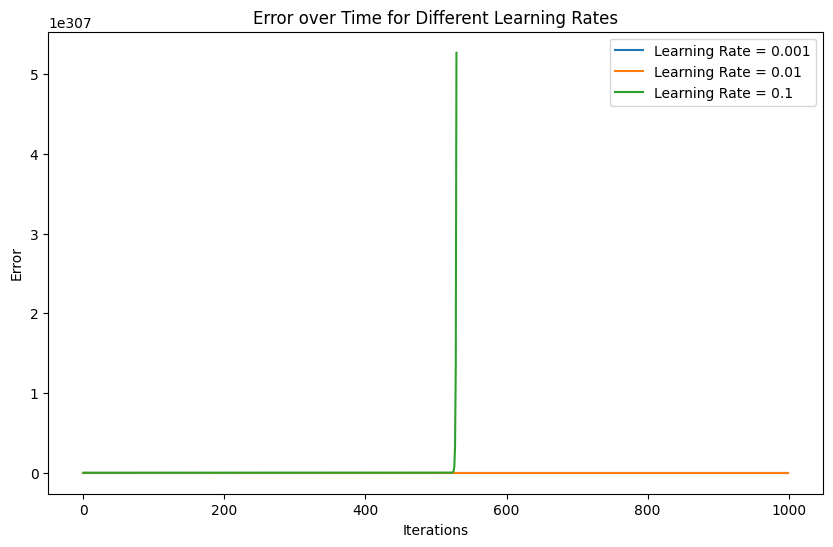

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('winequality-red.csv', sep=',')


X = data.drop(columns='quality').values
y = data['quality'].values.reshape(-1, 1)


N = X.shape[0]
train_size = int(0.5 * N)
indices = np.random.permutation(N)
train_indices, test_indices = indices[:train_size], indices[train_size:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]


mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


M = 30
iters = 1000
learning_rates = [0.001, 0.01, 0.1]


errors_over_time = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    W1, W2, error_over_time = backward(X_train, y_train, M, iters, lr)


    errors_over_time[lr] = error_over_time


    y_pred_test, _ = forward(X_test, W1, W2)
    test_rmse = rmse(y_test, y_pred_test)
    print(f"Test RMSE with learning rate {lr}: {test_rmse:.4f}")


plt.figure(figsize=(10, 6))
for lr, errors in errors_over_time.items():
    plt.plot(errors, label=f'Learning Rate = {lr}')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error over Time for Different Learning Rates')
plt.legend()
plt.show()